In [3]:
#Fifa statistics 2018
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('FIFA 2018 Statistics.csv')
print(df.head())
print(df.columns)

         Date          Team      Opponent  Goal Scored  Ball Possession %   
0  14-06-2018        Russia  Saudi Arabia            5                 40  \
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card   
0        13          7           3        3        6  ...            0  \
1         6          0           3        3        2  ...            0   
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO   
0             0    0  

In [5]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [6]:
df['Team'].value_counts()

Team
Belgium           7
Croatia           7
France            7
England           7
Russia            5
Brazil            5
Uruguay           5
Sweden            5
Switzerland       4
Denmark           4
Argentina         4
Spain             4
Portugal          4
Colombia          4
Japan             4
Mexico            4
Tunisia           3
Panama            3
Korea Republic    3
Poland            3
Costa Rica        3
Germany           3
Serbia            3
Saudi Arabia      3
Nigeria           3
Peru              3
Iceland           3
Australia         3
Iran              3
Morocco           3
Egypt             3
Senegal           3
Name: count, dtype: int64

<BarContainer object of 32 artists>

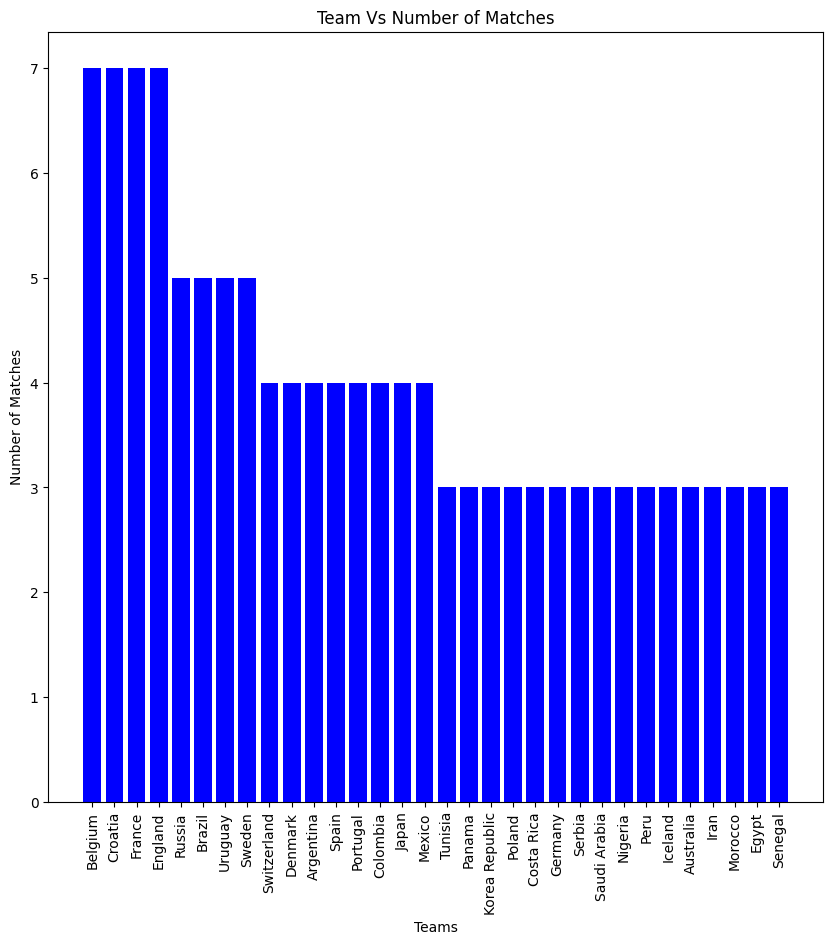

In [7]:
data=df['Team'].value_counts()
x=np.array(data.index)
y=np.array(data)
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title("Team Vs Number of Matches")
plt.xlabel("Teams")
plt.ylabel("Number of Matches")
plt.bar(x,y,color='blue')

Number of Teams--> 32


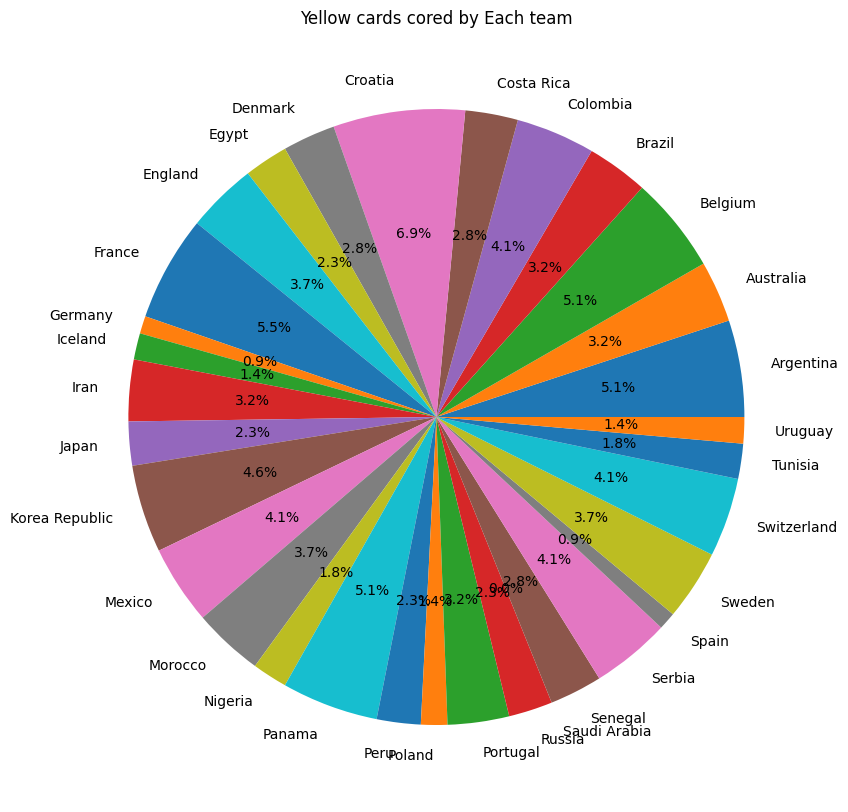

In [8]:
#Yellow card analysis
#label encoding
le=LabelEncoder()
yc=df.groupby('Team')['Yellow Card'].sum()
print("Number of Teams-->",df['Team'].nunique())
plt.figure(figsize=(10,10))
plt.pie(yc.values,labels=yc.index,autopct='%1.1f%%')
plt.title("Yellow cards cored by Each team")
plt.show()

In [9]:
round=df.groupby('Round')['Team'].nunique()
round

Round
3rd Place          2
Final              2
Group Stage       32
Quarter Finals     8
Round of 16       16
Semi- Finals       4
Name: Team, dtype: int64

Round
3rd Place                                        [Belgium, England]
Final                                             [France, Croatia]
Group Stage       [Russia, Saudi Arabia, Egypt, Uruguay, Morocco...
Quarter Finals    [Uruguay, France, Brazil, Belgium, Sweden, Eng...
Round of 16       [France, Argentina, Uruguay, Portugal, Spain, ...
Semi- Finals                    [France, Belgium, Croatia, England]
Name: Team, dtype: object
Round 1 Teams: ['Belgium' 'England']
Round 2 Teams: ['France' 'Croatia']
Round 3 Teams: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']
Round 4 Teams: ['Uruguay' 'France' 'Brazil' 'Belgium' 'Sweden' 'England' 'Russia'
 'Croatia']
Round 5 Teams: ['France' 'Argentina' 'Uruguay' 

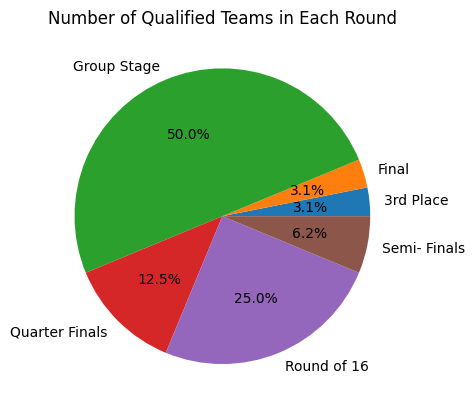

In [62]:
# Group the data by Round and count the number of teams that qualified
teams_by_round = df.groupby('Round')['Team'].nunique()

# Get the list of teams that qualified in each round
teams_list_by_round = df.groupby('Round')['Team'].unique()

# Plot the pie chart
plt.pie(teams_by_round.values, labels=teams_by_round.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Number of Qualified Teams in Each Round')

# Display the list of teams for each round
print(teams_list_by_round)
for i, round_teams in enumerate(teams_list_by_round):
    print(f"Round {i+1} Teams: {round_teams}")

# Show the chart
plt.show()


In [11]:
#max value
goal=np.array(df['Goal Scored'])
print(goal.max())
print(goal)

6
[5 0 0 1 0 1 3 3 2 1 1 1 0 1 2 0 0 1 0 1 1 1 1 0 3 0 1 2 1 2 1 2 3 1 1 0 1
 0 0 1 1 1 1 0 0 3 2 0 2 0 1 2 5 2 1 2 2 1 6 1 2 2 0 3 3 0 2 1 2 2 1 1 0 0
 0 2 1 2 1 2 2 0 0 3 0 2 2 2 0 1 0 1 1 2 0 1 4 3 2 1 1 1 1 1 2 0 3 2 1 0 1
 1 0 2 1 2 0 2 2 2 1 0 2 1 2 0 4 2]


In [12]:
#Outliers detection

threshold=3
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    return np.where(z_scores > threshold)

# Detect outliers in the 'Goal Scored' column
outliers = detect_outliers_zscore(df['Goal Scored'])

print(outliers)
# Remove the outliers from the dataset
df2 = df.drop(outliers[0])

# Print the updated dataset without outliers
print(df2.head())
print(df2.shape)

(array([ 0, 52, 58]),)
         Date          Team Opponent  Goal Scored  Ball Possession %   
1  14-06-2018  Saudi Arabia   Russia            0                 60  \
2  15-06-2018         Egypt  Uruguay            0                 43   
3  15-06-2018       Uruguay    Egypt            1                 57   
4  15-06-2018       Morocco     Iran            0                 64   
5  15-06-2018          Iran  Morocco            1                 36   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card   
1         6          0           3        3        2  ...            0  \
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   
5         8          2           5        1        2  ...            3   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO   
1             0    0         

In [13]:
#Processing missing values and finding its sum
#1st goals
fgoal=df['1st Goal']
df['1st Goal'].fillna(df['1st Goal'].mean(),inplace=True)

fgoal=df['Own goals']
df['Own goals'].fillna(df['Own goals'].mean(),inplace=True)

print(df)

           Date          Team      Opponent  Goal Scored  Ball Possession %   
0    14-06-2018        Russia  Saudi Arabia            5                 40  \
1    14-06-2018  Saudi Arabia        Russia            0                 60   
2    15-06-2018         Egypt       Uruguay            0                 43   
3    15-06-2018       Uruguay         Egypt            1                 57   
4    15-06-2018       Morocco          Iran            0                 64   
..          ...           ...           ...          ...                ...   
123  11-07-2018       England       Croatia            1                 46   
124  14-07-2018       Belgium       England            2                 43   
125  14-07-2018       England       Belgium            0                 57   
126  15-07-2018        France       Croatia            4                 39   
127  15-07-2018       Croatia        France            2                 61   

     Attempts  On-Target  Off-Target  Blocked  Corn

In [14]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
model=LinearRegression()

le=LabelEncoder()

df['Team']=le.fit_transform(df['Team'])
df['Opponent']=le.fit_transform(df['Opponent'])
df['Man of the Match']=le.fit_transform(df['Man of the Match'])

features=df.drop(['Date','PSO','Own goal Time','Man of the Match','Round'],axis=1)
result=df['Man of the Match']

x_train,x_test,y_train,y_test=train_test_split(features,result,test_size=0.3)

model.fit(x_train,y_train)

pred=model.predict(x_test)

print("Mean Squared Error-->",mean_squared_error(y_test,pred))

Mean Squared Error--> 0.31052551474799595


Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')


<Axes: >

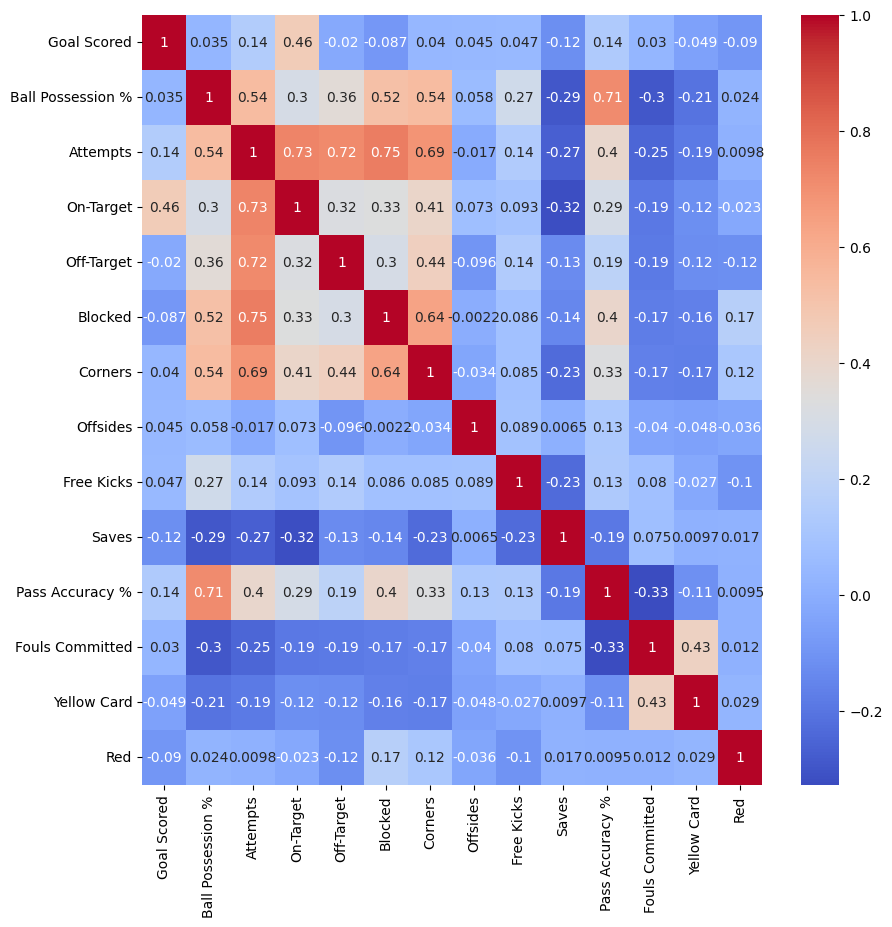

In [19]:
print(df.columns)
cols=['Goal Scored','Ball Possession %','Attempts','On-Target','Off-Target','Blocked','Corners','Offsides','Free Kicks','Saves','Pass Accuracy %','Fouls Committed','Yellow Card','Red']
data=df[cols]
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


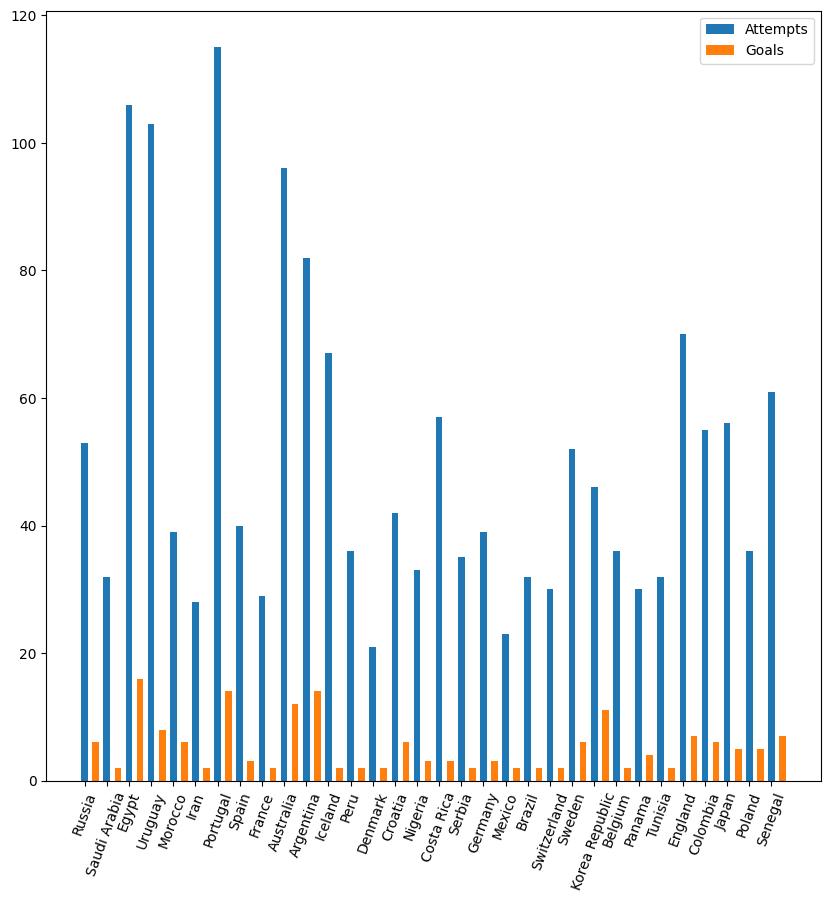

In [56]:
#Attempts vs goal scored
df=pd.read_csv('FIFA 2018 Statistics.csv')

attempts=np.array(df.groupby('Team')['Attempts'].sum())
goals=np.array(df.groupby('Team')['Goal Scored'].sum())

x=np.arange(len(attempts))

labels=df['Team'].unique()
print(labels)
plt.figure(figsize=(10,10))
plt.bar(x,attempts,width=0.3,label='Attempts')
plt.bar(x+0.5,goals,width=0.3,label='Goals')
plt.xticks(x,labels,rotation=70)
plt.subplots_adjust(wspace=0.4)
plt.legend()
plt.show()

[ 6  2 16  8  6  2 14  3  2 12 14  2  2  2  6  3  3  2  3  2  2  2  6 11
  2  4  2  7  6  5  5  7]


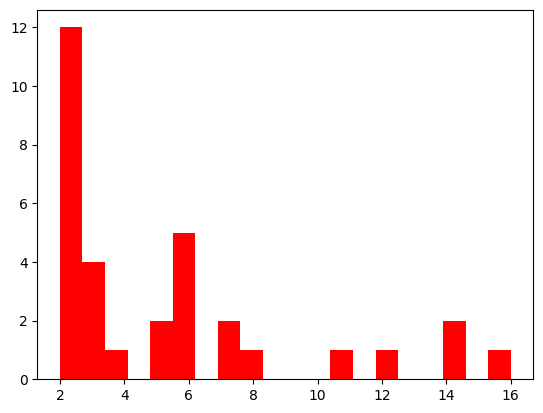

In [61]:
#histogram for goals scored
print(goals)
plt.hist(goals,bins=20,color='red')
plt.show()